In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('iris.csv')

In [ ]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


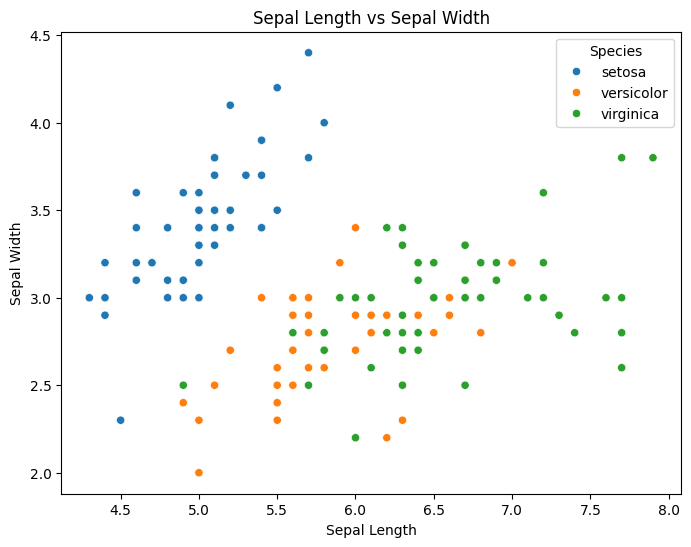

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sepal_Length', y='Sepal_Width', hue='Species', data=df)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

b. Use o boxplot e o histograma para caracterizar as propriedades
de cada uma das espécies existentes

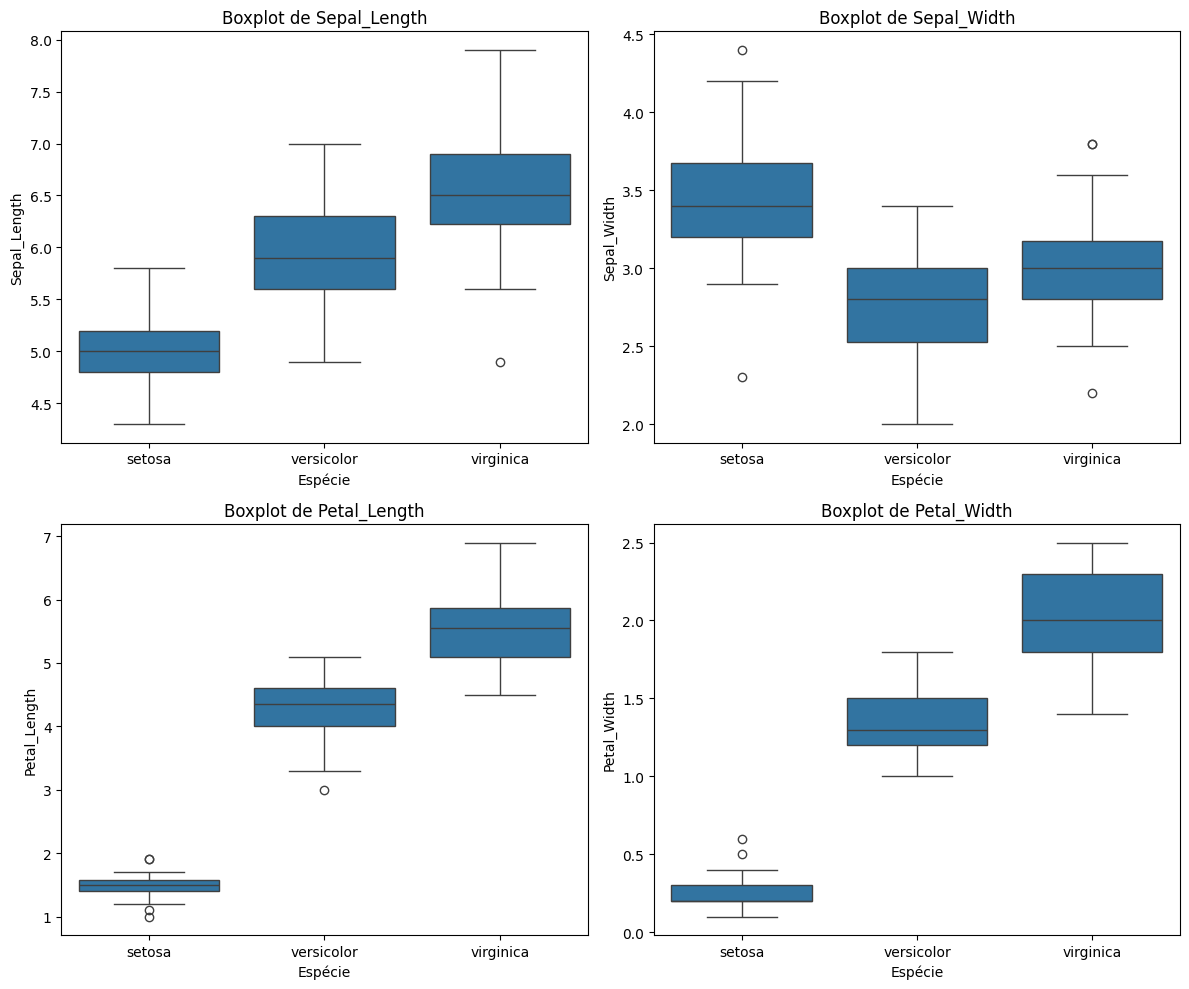

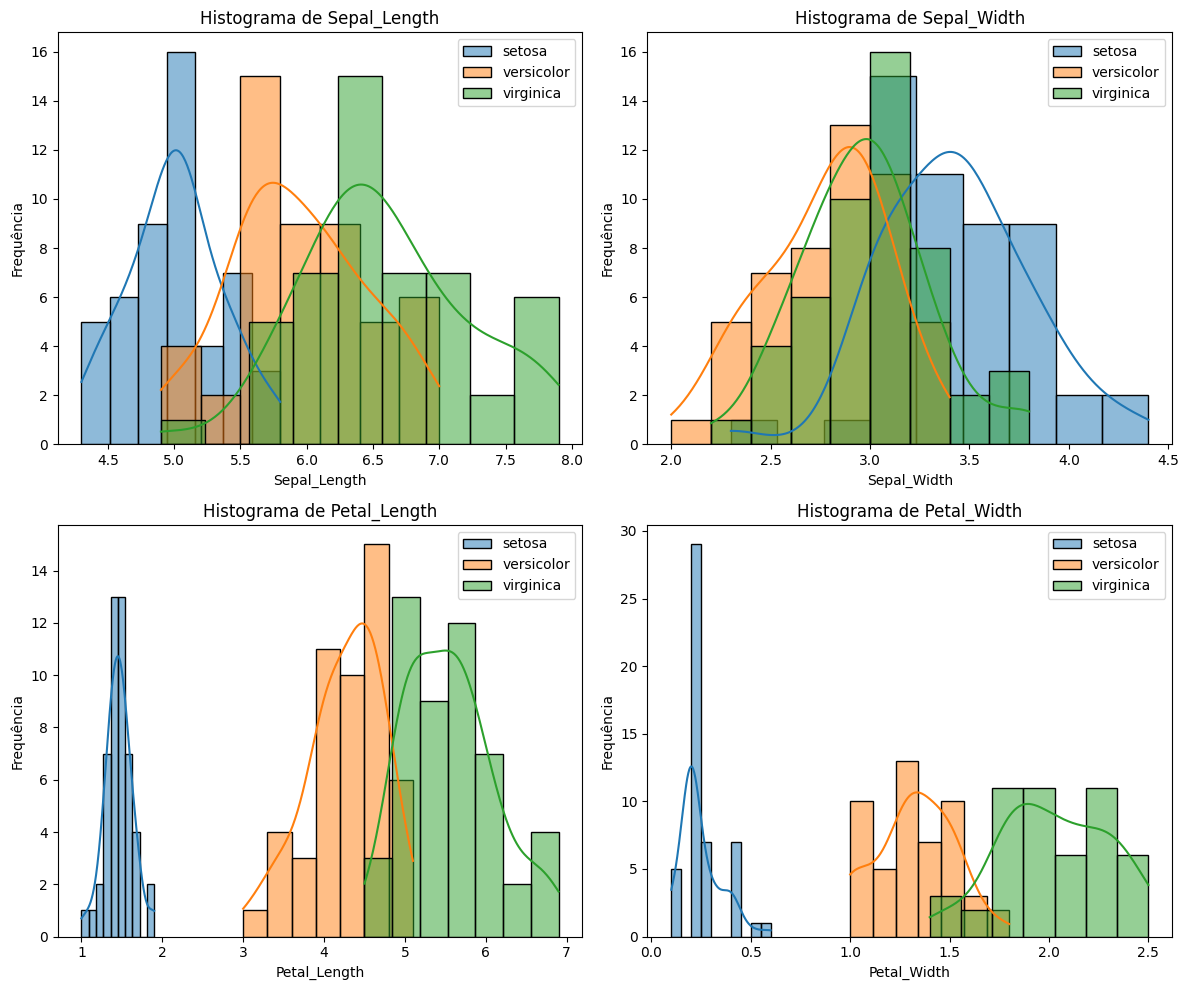

In [ ]:
# Definindo as propriedades de interesse
propriedades = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

# Criando subplots para cada propriedade
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Loop sobre cada propriedade para criar os gráficos
for i, propriedade in enumerate(propriedades):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Boxplot para a propriedade
    sns.boxplot(x='Species', y=propriedade, data=df, ax=ax)
    ax.set_title(f'Boxplot de {propriedade}')
    ax.set_xlabel('Espécie')
    ax.set_ylabel(propriedade)

plt.tight_layout()
plt.show()

# Criando subplots para cada propriedade
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Loop sobre cada propriedade para criar os gráficos
for i, propriedade in enumerate(propriedades):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Histograma para a propriedade
    for species in df['Species'].unique():
        sns.histplot(df[df['Species'] == species][propriedade], kde=True, ax=ax, label=species)
    ax.set_title(f'Histograma de {propriedade}')
    ax.set_xlabel(propriedade)
    ax.set_ylabel('Frequência')
    ax.legend()

plt.tight_layout()
plt.show()


c. Somente olhando esses gráficos, é possível utilizando uma ou
mais das propriedades (Sepal_Length, Sepal_Width, Petal_Length,
Petal_Width) que sejam suficientes para diferenciar entre as
diferentes espécies?

- Sepal_Width, então não é tão eficaz para distinguir entre elas.
- Setosa geralmente tem uma Petal_Length muito menor do que virginica e versicolor
- Petal_Length, Petal_Width também mostra uma clara diferenciação entre as espécies, com setosa geralmente tendo uma Petal_Width menor do que as outras espécies

d. Aplique a regressão logística para avaliar o modelo de
classificação.


In [ ]:
# Separar as features (X) e o target (y)
X = df[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']]
y = df['Species']

# treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modelo de regressão logística
model = LogisticRegression(max_iter=1000)

# treinando
model.fit(X_train, y_train)

# previsões
y_pred = model.predict(X_test)

e. Calcule a acurácia, precisão e recall

In [ ]:
# desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo: 1.0

Matriz de Confusão:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




f. Plote a matriz de confusao com matplotlib ou seaborn



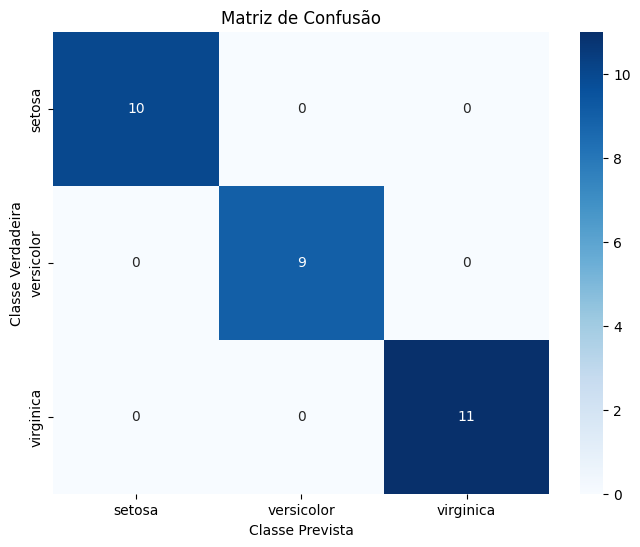

In [ ]:
# matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

2. Utilizando o dataset load_digits. Exemplo de como fazer a
importação do dataset usando o sklearn:
from sklearn.datasets import load_digits
digits = load_digits()
Responda:
a. Faça uma análise inicial sobre esse dataset
i. Quantos dados possui?
ii. Existem dados nulos? Se sim quantos?
iii. Todos são dados numéricos ou existem colunas com dados categóricos?

In [ ]:
from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


In [ ]:
digits = load_digits()

In [ ]:
num_instances = len(digits.data)
print("Número de instâncias:", num_instances)

Número de instâncias: 1797


In [ ]:
num_null = pd.DataFrame(digits.data).isnull().sum().sum()
if num_null == 0:
    print("Não existem dados nulos.")
else:
    print("Existem", num_null, "dados nulos.")

Não existem dados nulos.


In [ ]:
data_type = pd.DataFrame(digits.data).dtypes
if data_type.any() == 'object':
    print("Existem colunas com dados categóricos.")
else:
    print("Todos os dados são numéricos.")

Todos os dados são numéricos.


b. Aplique a regressão logística para avaliar o modelo de classificação.

In [ ]:
# treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão logística
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train, y_train)

# Prever os rótulos para o conjunto de teste
y_pred = logistic_regression.predict(X_test)



c. Calcule a acurácia, precisão e recall.

In [ ]:
# acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# precisão
precision = precision_score(y_test, y_pred, average='weighted')
print("Precisão:", precision)

# recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)


Acurácia: 0.9722222222222222
Precisão: 0.9725599634194969
Recall: 0.9722222222222222


d. Plote a matriz de confusão com matplotlib ou seaborn

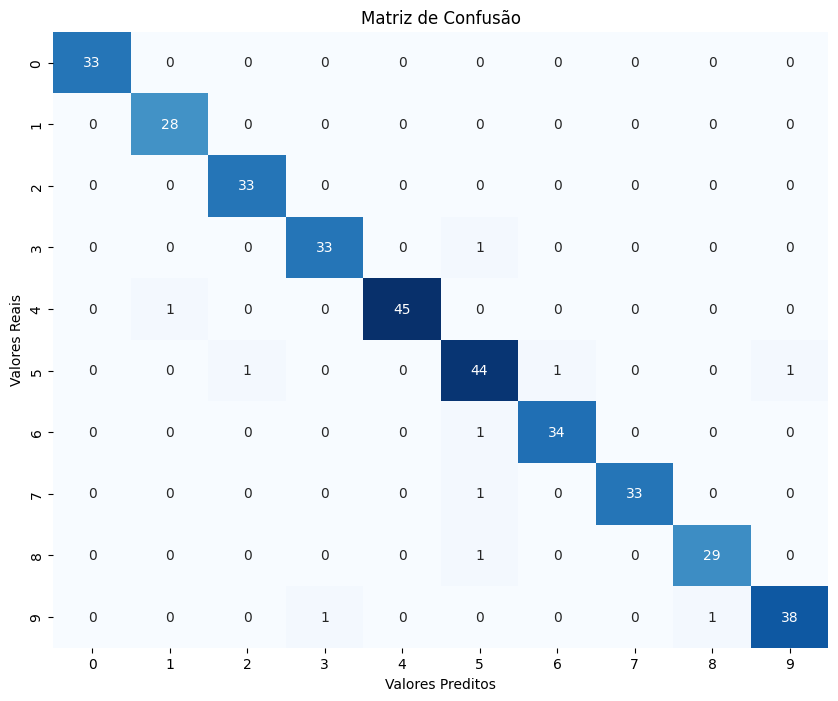

In [ ]:
# matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# plotar
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão")
plt.xlabel("Valores Preditos")
plt.ylabel("Valores Reais")
plt.show()


e. Aplique a regressão logística para avaliar o modelo de classificação dos dígitos de
0-9 que são disponibilizados neste dataset.

In [ ]:
# treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# modelo de regressão logística
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train, y_train)

# Prever os rótulos para o conjunto de teste
y_pred = logistic_regression.predict(X_test)


f. Calcule a acurácia, precisão e recall.


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

precision = precision_score(y_test, y_pred, average='weighted')
print("Precisão:", precision)

recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

Acurácia: 0.9722222222222222
Precisão: 0.9725599634194969
Recall: 0.9722222222222222


g. Plote a matriz de confusao com matplotlib ou seaborn

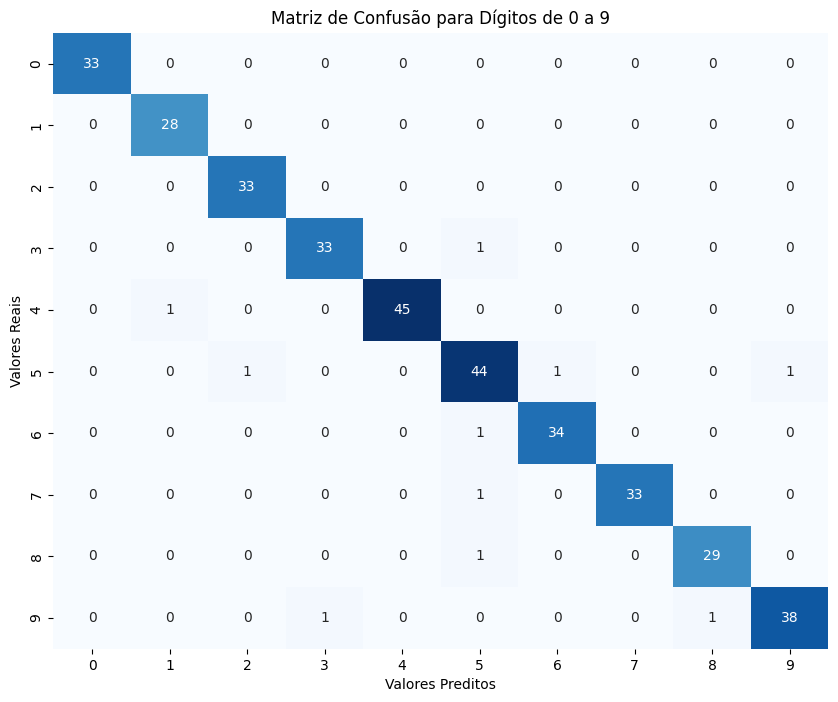

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão para Dígitos de 0 a 9")
plt.xlabel("Valores Preditos")
plt.ylabel("Valores Reais")
plt.show()